# Gravity
**Description:**  Gridded gravity anomaly data from various sources.

**Datasets:** 

ANTGG-update accessed from https://ftp.space.dtu.dk/pub/RF/4D-ANTARCTICA/

Uieda, Leonardo. “Fatiando a Terra Data: Earth - Gravity Grid at 10 Arc-Minute Resolution.” Zenodo, January 20, 2022. https://doi.org/10.5281/zenodo.5882207.

Förste, Christoph, Sean.L. Bruinsma, Oleg Abrikosov, Jean-Michel Lemoine, Jean Charles Marty, Frank Flechtner, G. Balmino, F. Barthelmes, and R. Biancale. “EIGEN-6C4 The Latest Combined Global Gravity Field Model Including GOCE Data up to Degree and Order 2190 of GFZ Potsdam and GRGS Toulouse.” Application/octet-stream,application/octet-stream,application/zip. GFZ Data Services, 2014. https://doi.org/10.5880/ICGEM.2015.1.

**Associated papers:** 

Scheinert, M., F. Ferraccioli, J. Schwabe, R. Bell, M. Studinger, D. Damaske, W. Jokat, et al. “New Antarctic Gravity Anomaly Grid for Enhanced Geodetic and Geophysical Studies in Antarctica.” Geophysical Research Letters 43, no. 2 (2016): 600–610. https://doi.org/10.1002/2015GL067439.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions

In [2]:
version_names = [
    "antgg",
    "antgg-update",
    "eigen",
]

grids = []
titles = []
for name in version_names:
    if name == "antgg":
        anomaly_types = ["FA", "BA"]
    elif name == "antgg-update":
        anomaly_types = ["FA", "DG", "BA", "Err"]
    elif name == "eigen":
        anomaly_types = [None]

    for a in anomaly_types:
        titles.append(f"{name}, anomaly type: {a}")
        data = fetch.gravity(
            version=name,
            anomaly_type=a,
            # available options
            # region,
            # spacing,
            # registration ("g" for gridline or "p" for pixel),
        )
        grids.append(data)

100%|█████████████████████████████████████| 13.4M/13.4M [00:00<00:00, 27.7GB/s]
100%|█████████████████████████████████████| 11.7M/11.7M [00:00<00:00, 31.0GB/s]
100%|█████████████████████████████████████| 2.52M/2.52M [00:00<00:00, 3.48GB/s]
grdproject [WARNING]: x_inc does not divide 180; geographic boundary condition changed to natural.
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


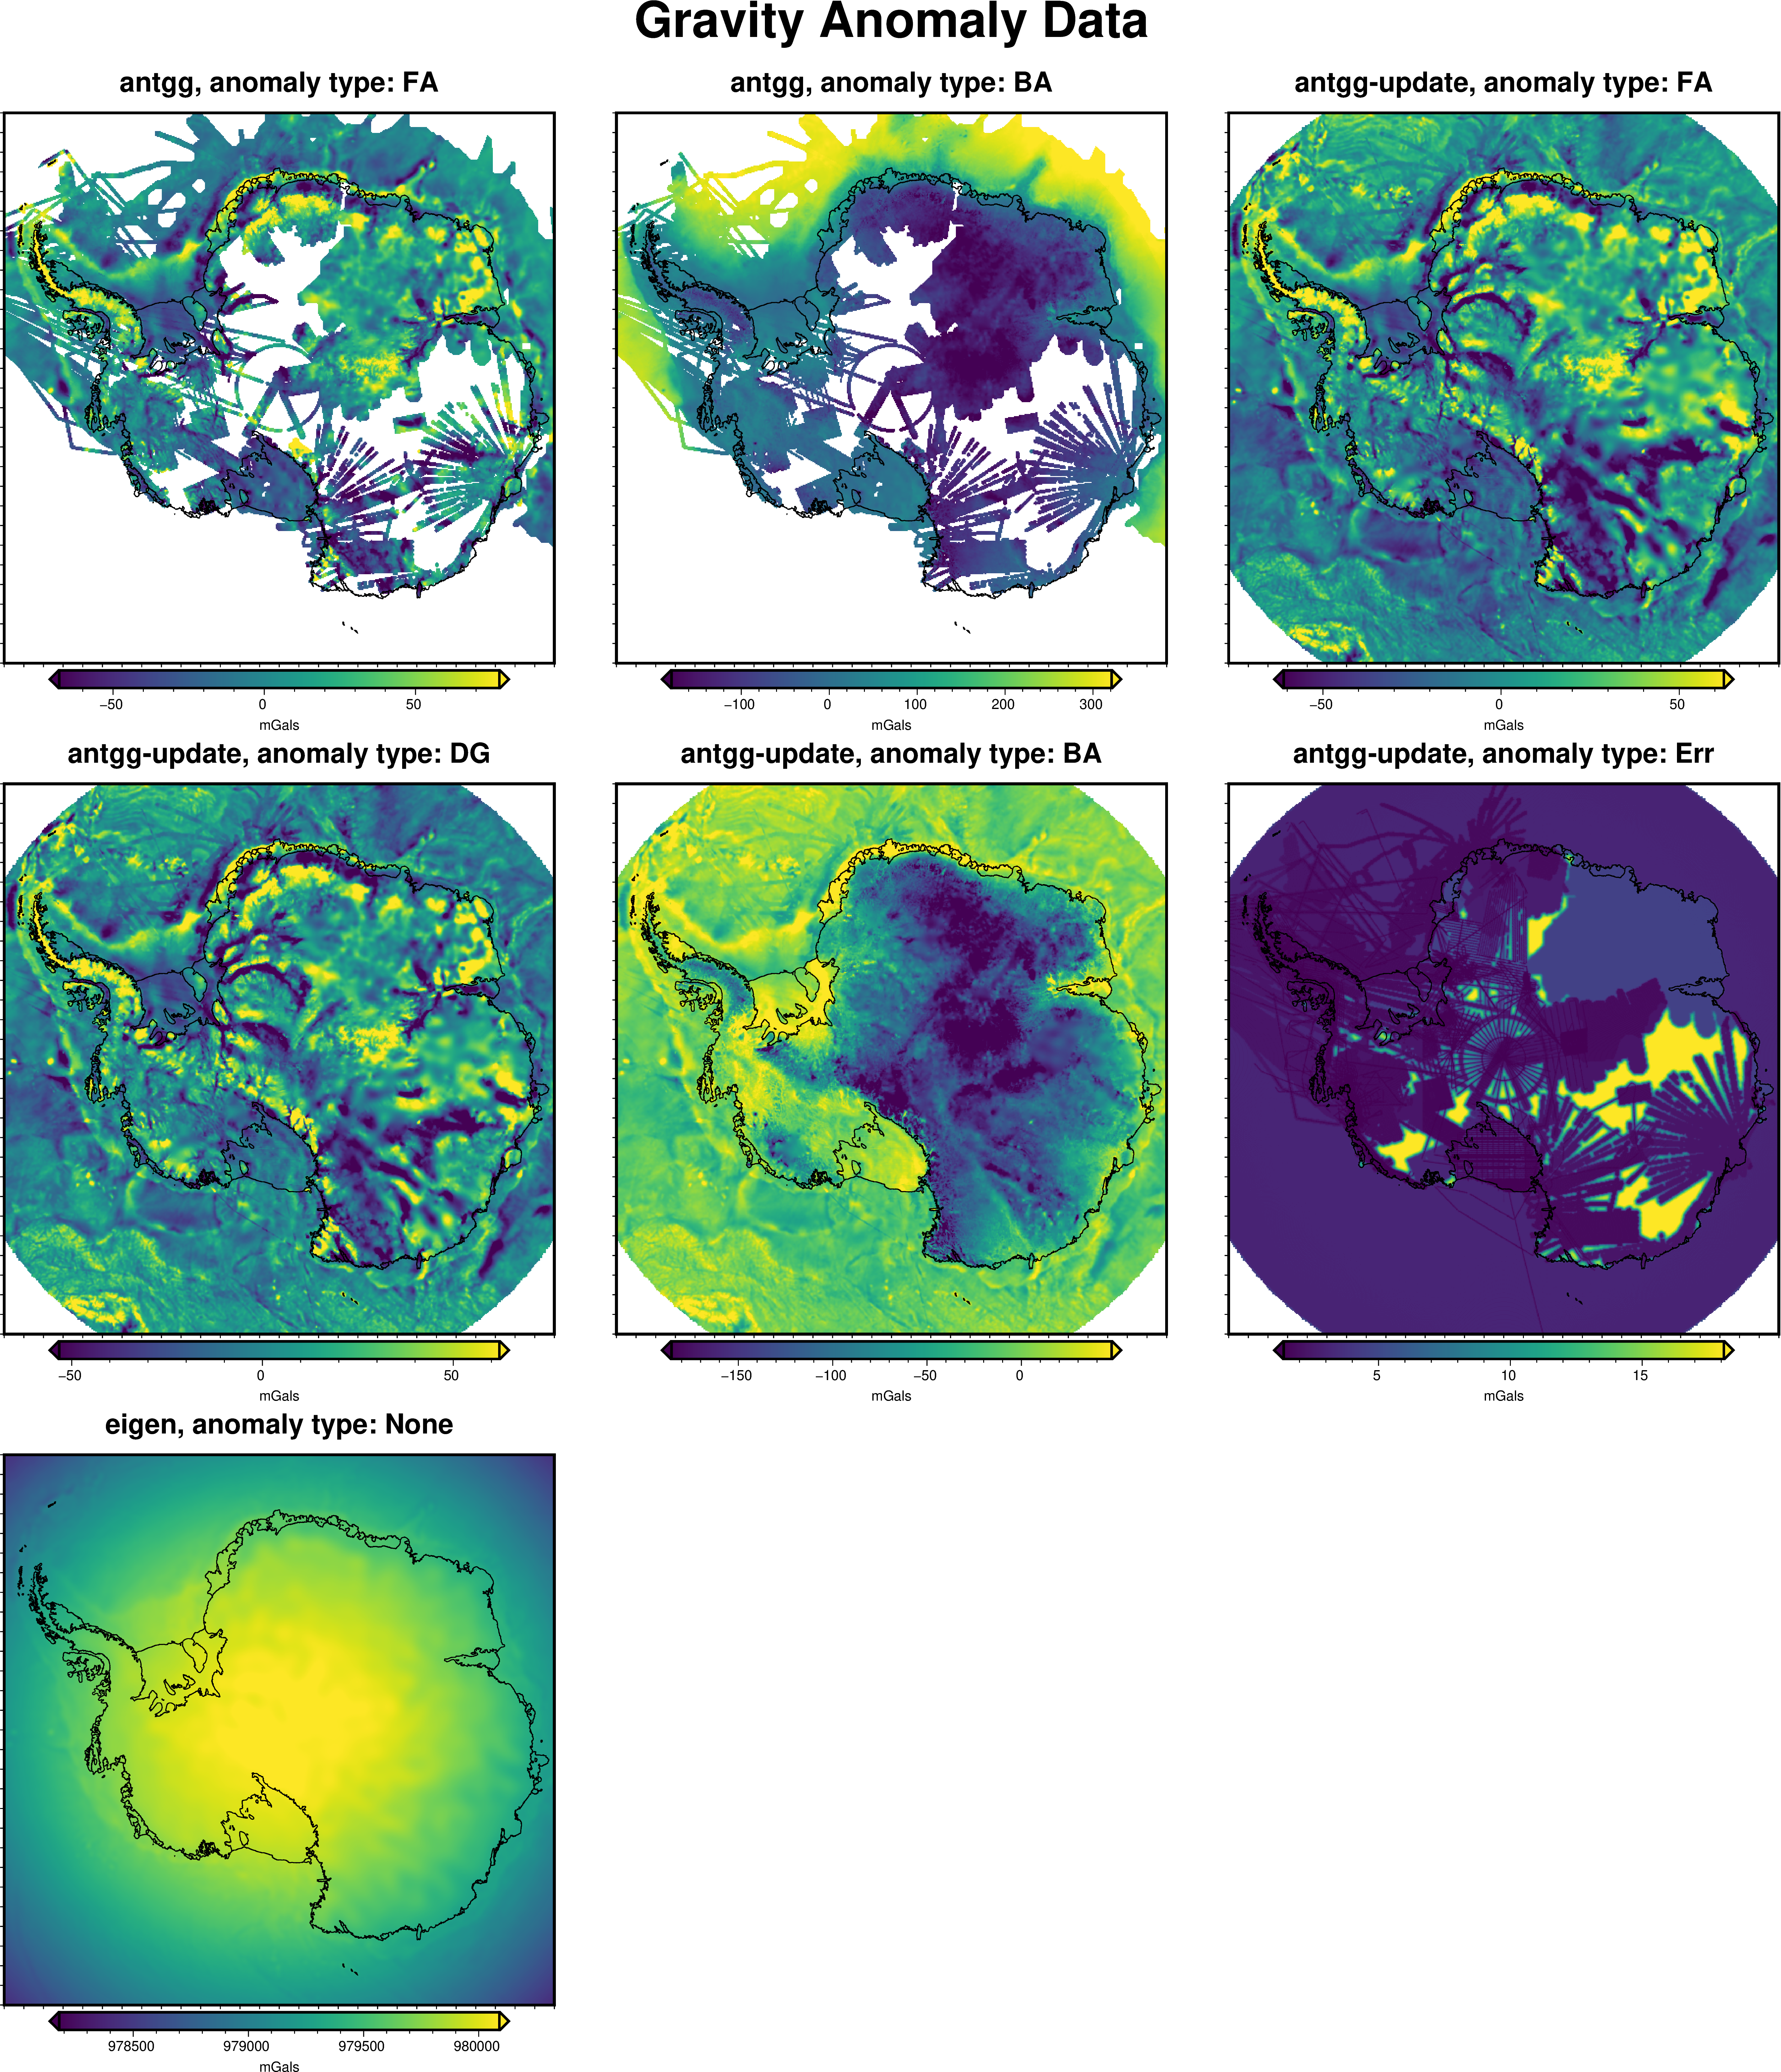

In [3]:
fig = maps.subplots(
    grids,
    region=regions.antarctica,
    fig_title="Gravity Anomaly Data",
    subplot_titles=titles,
    cbar_labels=["mGals" for x in grids],
    margins=".5c/1.3c",
    coast=True,
    cmaps=["viridis" for x in grids],
    hemisphere="south",
    robust=True,
)
fig.show()